In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/reddit_depression_dataset.csv")
df.head()

C:\Users\snrup\AppData\Local\Temp\ipykernel_12392\4233436037.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/reddit_depression_dataset.csv")


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,1.405309e+09,NaN,0.0
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.410568e+09,1.0,0.0
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.416458e+09,1.0,0.0
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",NaN,25.0,1.416512e+09,2.0,0.0
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,1.416516e+09,4.0,0.0


In [3]:
df.shape

(2470778, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470778 entries, 0 to 2470777
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    object 
 1   subreddit     object 
 2   title         object 
 3   body          object 
 4   upvotes       float64
 5   created_utc   float64
 6   num_comments  float64
 7   label         float64
dtypes: float64(4), object(4)
memory usage: 150.8+ MB


In [6]:
df.isnull().sum()

Unnamed: 0           3
subreddit           20
title               23
body            461051
upvotes             64
created_utc        106
num_comments    113977
label              106
dtype: int64

In [7]:
df['label'].value_counts()

label
0.0    1990261
1.0     480411
Name: count, dtype: int64

In [8]:
(df['label'].value_counts() / len(df)) * 100

label
0.0    80.551996
1.0    19.443714
Name: count, dtype: float64

In [9]:
df['title'] = df['title'].fillna("")
df['body'] = df['body'].fillna("")

df['raw_text'] = df['title'] + " " + df['body']
df['text_len'] = df['raw_text'].apply(lambda x: len(x.split()))

In [10]:
df['text_len'].describe()

count    2.470778e+06
mean     8.051664e+01
std      1.677611e+02
min      0.000000e+00
25%      1.400000e+01
50%      2.900000e+01
75%      8.000000e+01
max      1.589400e+04
Name: text_len, dtype: float64

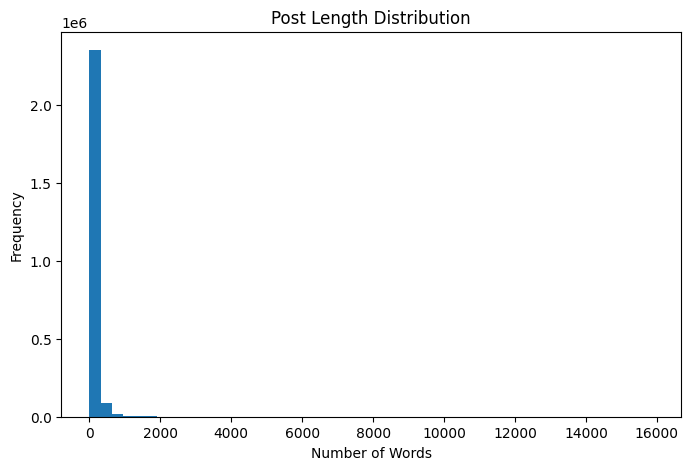

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df['text_len'], bins=50)
plt.title("Post Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.groupby('label')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,1990261.0,52.119681,121.689564,0.0,12.0,23.0,49.0,15894.0
1.0,480411.0,198.175142,257.315266,1.0,59.0,123.0,241.0,7813.0
